In [1]:
from osgeo import gdal, ogr
import os
import rasterio
from rasterio.features import rasterize
from shapely.geometry import shape
import json
import numpy as np
import matplotlib.pyplot as plt

In [11]:

def create_building_mask_rasterio(rasterSrc, vectorSrc, outputMaskPath, noDataValue=0, burn_values=1):
    '''
    Create building mask for rasterSrc,
    Similar to labeltools/createNPPixArray() in spacenet utilities
    '''
    
    # Open source vector file that contains truth data
    source_ds = ogr.Open(vectorSrc)
    source_layer = source_ds.GetLayer()

    # Extract data from source Raster File to be emulated
    srcRas_ds = gdal.Open(rasterSrc)
    cols = srcRas_ds.RasterXSize
    rows = srcRas_ds.RasterYSize

    # Create output raster memory layer, units are pixels
    memdrv = gdal.GetDriverByName('GTiff')
    dst_ds = memdrv.Create(outputMaskPath, cols, rows, 1, gdal.GDT_Byte, options=['COMPRESS=LZW'])
    dst_ds.SetGeoTransform(srcRas_ds.GetGeoTransform())
    dst_ds.SetProjection(srcRas_ds.GetProjection())
    band = dst_ds.GetRasterBand(1)
    band.SetNoDataValue(noDataValue)
    gdal.RasterizeLayer(dst_ds, [1], source_layer, burn_values=[burn_values])
    dst_ds = None

    print(f"Building mask saved to {outputMaskPath}")


In [3]:
# folder marking
image_folder = 'dataset/source'
label_folder = 'dataset/labels'
output_mask_folder = "dataset/building_mask"

# Ensure the output directory exists
os.makedirs(output_mask_folder, exist_ok=True)


In [7]:
# Iterate over all files in the image folder
for filename in os.listdir(image_folder):
    # Get the file extension
    file_ext = os.path.splitext(filename)[1]

    # Check if it's an image file (e.g., .tif, .jpg, .png, etc.)
    if file_ext in ['.tif', '.jpg', '.png', '.jpeg']:  # add more extensions as needed
        image_path = os.path.join(image_folder, filename)

        # Find the corresponding GeoJSON file in the label folder
        geojson_filename = os.path.splitext(filename)[0] + '.geojson'
        geojson_building_path = os.path.join(label_folder, geojson_filename)

        # Create the output mask file path
        mask_filename = os.path.splitext(filename)[0] + '_mask.tif'
        mask_path = os.path.join(output_mask_folder, mask_filename)

        if not os.path.exists(geojson_building_path):
            print(f"Label file not found for image: {image_path}")
            continue

        # Create the building mask and save it
        create_building_mask(image_path, geojson_building_path, mask_path)

Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1046_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1047_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1048_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1049_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1050_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1051_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1052_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1053_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1054_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1055_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1056_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1057_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img

In [8]:
def check_raster_dtype(raster_path):
    with rasterio.open(raster_path) as src:
        print(f"Data type of raster: {src.dtypes[0]}")



In [9]:
image_folder = 'dataset/source'
label_folder = 'dataset/labels'
output_mask_folder = "dataset/building_mask"


os.makedirs(output_mask_folder, exist_ok=True)


In [12]:
for filename in os.listdir(image_folder):
    if filename.endswith('.tif'):
        image_path = os.path.join(image_folder, filename)
        geojson_building_path = os.path.join(label_folder, f"{os.path.splitext(filename)[0]}.geojson")
        mask_path = os.path.join(output_mask_folder, f"{os.path.splitext(filename)[0]}_mask.tif")

        if not os.path.exists(geojson_building_path):
            print(f"Label file not found for image: {image_path}")
            continue

     
        create_building_mask_rasterio(image_path, geojson_building_path, mask_path)


Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1046_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1047_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1048_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1049_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1050_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1051_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1052_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1053_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1054_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1055_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1056_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img1057_mask.tif
Building mask saved to dataset/building_mask\3band_AOI_1_RIO_img

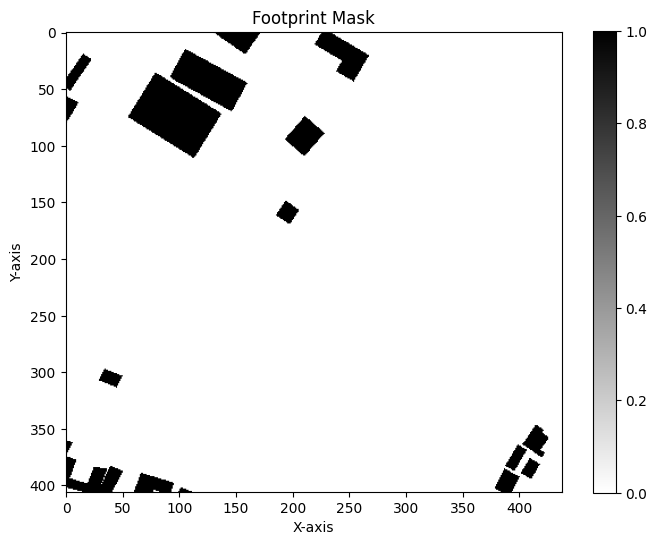

Mask saved as PNG to C:\Users\raksh\isro\dataset\building_mask\3band_AOI_1_RIO_img739_mask.png


In [15]:


import matplotlib.pyplot as plt
import rasterio

mask_path = 'C:\\Users\\raksh\\isro\\dataset\\building_mask\\3band_AOI_1_RIO_img739_mask.tif'
cmap = 'binary'

with rasterio.open(mask_path) as src:
    mask = src.read(1)  


plt.figure(figsize=(8, 6))
plt.imshow(mask, cmap=cmap)
plt.title('Footprint Mask')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar()
plt.show()
output_png_path = mask_path.replace('_mask.tif', '_mask.png')
plt.imsave(output_png_path, mask, cmap=cmap)
print(f"Mask saved as PNG to {output_png_path}")
